In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import math

# Define Vision Transformer from scratch
class VisionTransformer(nn.Module):
    def __init__(self, image_size=224, patch_size=16, num_classes=10, embed_dim=768, num_heads=8, num_layers=12):
        super(VisionTransformer, self).__init__()
        self.patch_size = patch_size
        self.num_patches = (image_size // patch_size) ** 2
        self.embed_dim = embed_dim

        self.patch_embedding = nn.Conv2d(3, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embed_dim))

        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True),
            num_layers=num_layers
        )

        self.mlp_head = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        x = self.patch_embedding(x).flatten(2).transpose(1, 2)
        batch_size = x.shape[0]
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embedding
        x = self.transformer(x)
        x = self.mlp_head(x[:, 0])
        return x

# Define Transformer Encoder for text from scratch
class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size=30522, embed_dim=256, num_heads=8, num_layers=6, max_length=10):
        super(TransformerEncoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_embedding = nn.Parameter(torch.randn(1, max_length, embed_dim))

        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True),
            num_layers=num_layers
        )

        self.fc = nn.Linear(embed_dim, embed_dim)

    def forward(self, input_ids):
        x = self.embedding(input_ids) + self.pos_embedding[:, :input_ids.shape[1], :]
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling to ensure fixed shape output
        return self.fc(x)

# Define Multimodal Fusion Model
class MultiModalClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super(MultiModalClassifier, self).__init__()
        self.image_encoder = VisionTransformer()
        self.text_encoder = TransformerEncoder()
        self.fusion = nn.Linear(768 + 256, 512)
        self.classifier = nn.Linear(512, num_classes)

    def forward(self, image, input_ids):
        img_features = self.image_encoder(image)
        txt_features = self.text_encoder(input_ids)
        fused = torch.cat((img_features, txt_features), dim=1)
        fused = torch.relu(self.fusion(fused))
        output = self.classifier(fused)
        return output

# Define Tokenizer and Data Preprocessing
def simple_tokenizer(texts, vocab, max_length=10):
    tokenized = [[vocab.get(word, 0) for word in text.split()] for text in texts]
    # Pad sequences to ensure consistent length
    padded = [seq + [0] * (max_length - len(seq)) if len(seq) < max_length else seq[:max_length] for seq in tokenized]
    return padded

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Example Usage
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MultiModalClassifier(num_classes=10).to(device)

    # Dummy inputs
    image = torch.randn(2, 3, 224, 224).to(device)  # Batch of 2 images
    vocab = {word: idx for idx, word in enumerate(["this", "is", "a", "sample", "text", "another", "example"])}
    text = ["this is a sample text", "another example text"]
    text_inputs = torch.tensor(simple_tokenizer(text, vocab)).to(device)

    output = model(image, text_inputs)
    print(output.shape)  # Should print torch.Size([2, 10])

torch.Size([2, 10])


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import math

# Define Vision Transformer from scratch
class VisionTransformer(nn.Module):
    def __init__(self, image_size=224, patch_size=16, num_classes=10, embed_dim=768, num_heads=8, num_layers=12):
        super(VisionTransformer, self).__init__()
        self.patch_size = patch_size
        self.num_patches = (image_size // patch_size) ** 2
        self.embed_dim = embed_dim

        self.patch_embedding = nn.Conv2d(3, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embed_dim))

        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True),
            num_layers=num_layers
        )

        self.mlp_head = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        x = self.patch_embedding(x).flatten(2).transpose(1, 2)
        batch_size = x.shape[0]
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embedding
        x = self.transformer(x)
        x = self.mlp_head(x[:, 0])
        return x

# Define Transformer Encoder for text from scratch
class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size=30522, embed_dim=256, num_heads=8, num_layers=6, max_length=10):
        super(TransformerEncoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_embedding = nn.Parameter(torch.randn(1, max_length, embed_dim))

        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True),
            num_layers=num_layers
        )

        self.fc = nn.Linear(embed_dim, embed_dim)

    def forward(self, input_ids):
        x = self.embedding(input_ids) + self.pos_embedding[:, :input_ids.shape[1], :]
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling to ensure fixed shape output
        return self.fc(x)

# Define Multimodal Fusion Model
class MultiModalClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super(MultiModalClassifier, self).__init__()
        self.image_encoder = VisionTransformer()
        self.text_encoder = TransformerEncoder()
        self.fusion = nn.Linear(768 + 256, 512)
        self.classifier = nn.Linear(512, num_classes)

    def forward(self, image, input_ids):
        img_features = self.image_encoder(image)
        txt_features = self.text_encoder(input_ids)
        fused = torch.cat((img_features, txt_features), dim=1)
        fused = torch.relu(self.fusion(fused))
        output = self.classifier(fused)
        return output

# Training and Testing Functions
def train(model, dataloader, criterion, optimizer, device):
    model.train()
    for images, texts, labels in dataloader:
        images, texts, labels = images.to(device), texts.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images, texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def test(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for images, texts, labels in dataloader:
            images, texts, labels = images.to(device), texts.to(device), labels.to(device)
            outputs = model(images, texts)
            total_loss += criterion(outputs, labels).item()
            correct += (outputs.argmax(dim=1) == labels).sum().item()
    return total_loss / len(dataloader), correct / len(dataloader.dataset)

# Example Usage
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MultiModalClassifier(num_classes=10).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()

    # Placeholder dataloader (replace with actual data)
    class DummyDataset(torch.utils.data.Dataset):
        def __len__(self):
            return 100
        def __getitem__(self, idx):
            return torch.randn(3, 224, 224), torch.randint(0, 30522, (10,)), torch.tensor(idx % 10)

    train_loader = torch.utils.data.DataLoader(DummyDataset(), batch_size=8, shuffle=True)
    test_loader = torch.utils.data.DataLoader(DummyDataset(), batch_size=8, shuffle=False)

    for epoch in range(5):
        train(model, train_loader, criterion, optimizer, device)
        test_loss, test_acc = test(model, test_loader, criterion, device)
        print(f"Epoch {epoch+1}: Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}")

Epoch 1: Test Loss = 2.3340, Test Accuracy = 0.1000
Epoch 2: Test Loss = 2.3296, Test Accuracy = 0.1000
Epoch 3: Test Loss = 2.3083, Test Accuracy = 0.1000
Epoch 4: Test Loss = 2.3094, Test Accuracy = 0.1000
Epoch 5: Test Loss = 2.3214, Test Accuracy = 0.1000


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import math

# Define Vision Transformer from scratch
class VisionTransformer(nn.Module):
    def __init__(self, image_size=224, patch_size=16, num_classes=10, embed_dim=768, num_heads=8, num_layers=12):
        super(VisionTransformer, self).__init__()
        self.patch_size = patch_size
        self.num_patches = (image_size // patch_size) ** 2
        self.embed_dim = embed_dim

        self.patch_embedding = nn.Conv2d(3, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embed_dim))

        self.transformer = nn.Sequential(
            *[TransformerBlock(embed_dim, num_heads) for _ in range(num_layers)]
        )

        self.mlp_head = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        x = self.patch_embedding(x).flatten(2).transpose(1, 2)
        batch_size = x.shape[0]
        cls_tokens = self.cls_token.expand(batch_size, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x += self.pos_embedding
        x = self.transformer(x)
        x = self.mlp_head(x[:, 0])
        return x

# Define Transformer Block from scratch
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(TransformerBlock, self).__init__()
        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
        self.num_heads = num_heads
        self.scale = math.sqrt(embed_dim // num_heads)

        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_dim, 4 * embed_dim),
            nn.ReLU(),
            nn.Linear(4 * embed_dim, embed_dim)
        )

    def forward(self, x):
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)

        attn_scores = torch.matmul(q, k.transpose(-2, -1)) / self.scale
        attn_weights = torch.nn.functional.softmax(attn_scores, dim=-1)
        attn_output = torch.matmul(attn_weights, v)

        x = self.norm1(x + attn_output)
        ff_output = self.feed_forward(x)
        x = self.norm2(x + ff_output)
        return x

# Define Transformer Encoder for text from scratch
class TransformerEncoder(nn.Module):
    def __init__(self, vocab_size=30522, embed_dim=256, num_heads=8, num_layers=6, max_length=10):
        super(TransformerEncoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_embedding = nn.Parameter(torch.randn(1, max_length, embed_dim))

        self.transformer = nn.Sequential(
            *[TransformerBlock(embed_dim, num_heads) for _ in range(num_layers)]
        )

        self.fc = nn.Linear(embed_dim, embed_dim)

    def forward(self, input_ids):
        x = self.embedding(input_ids) + self.pos_embedding[:, :input_ids.shape[1], :]
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling to ensure fixed shape output
        return self.fc(x)

# Define Multimodal Fusion Model
class MultiModalClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super(MultiModalClassifier, self).__init__()
        self.image_encoder = VisionTransformer()
        self.text_encoder = TransformerEncoder()
        self.fusion = nn.Linear(768 + 256, 512)
        self.classifier = nn.Linear(512, num_classes)

    def forward(self, image, input_ids):
        img_features = self.image_encoder(image)
        txt_features = self.text_encoder(input_ids)
        fused = torch.cat((img_features, txt_features), dim=1)
        fused = torch.relu(self.fusion(fused))
        output = self.classifier(fused)
        return output

# Training and Testing Functions
# (Same as before)

# Example Usage
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MultiModalClassifier(num_classes=10).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()

    # Placeholder dataloader (replace with actual data)
    class DummyDataset(torch.utils.data.Dataset):
        def __len__(self):
            return 100
        def __getitem__(self, idx):
            return torch.randn(3, 224, 224), torch.randint(0, 30522, (10,)), torch.tensor(idx % 10)

    train_loader = torch.utils.data.DataLoader(DummyDataset(), batch_size=8, shuffle=True)
    test_loader = torch.utils.data.DataLoader(DummyDataset(), batch_size=8, shuffle=False)

    for epoch in range(5):
        train(model, train_loader, criterion, optimizer, device)
        test_loss, test_acc = test(model, test_loader, criterion, device)
        print(f"Epoch {epoch+1}: Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}")

Epoch 1: Test Loss = 2.3572, Test Accuracy = 0.1000
Epoch 2: Test Loss = 2.3175, Test Accuracy = 0.1000
Epoch 3: Test Loss = 2.3106, Test Accuracy = 0.1000
Epoch 4: Test Loss = 2.3088, Test Accuracy = 0.1000
Epoch 5: Test Loss = 2.3125, Test Accuracy = 0.1000


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np

# --- Custom Dataset Loader for Multimodal Data ---
class MultimodalDataset(Dataset):
    def __init__(self, image_paths, texts, labels, transform=None):
        self.image_paths = image_paths  # List of image file paths
        self.texts = texts  # List of textual descriptions
        self.labels = labels  # Binary labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Load Image (Placeholder: Generate random tensor instead of actual image loading)
        image = torch.randn(3, 224, 224)  # Random image tensor as placeholder
        if self.transform:
            image = self.transform(image)

        # Tokenize Text (Simple token encoding as placeholder)
        text_embedding = torch.randn(1, 512)  # Random text embedding as placeholder

        label = torch.tensor(self.labels[idx], dtype=torch.long)

        return image, text_embedding, label

# --- Vision Transformer (ViT) from Scratch ---
class ViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=512, num_heads=8, num_layers=6):
        super(ViT, self).__init__()
        self.patch_size = patch_size
        self.num_patches = (img_size // patch_size) ** 2
        self.embedding_dim = embed_dim

        # Patch embedding
        self.patch_embed = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Positional encoding
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embed_dim))

        # Transformer Encoder
        self.encoder = TransformerEncoder(embed_dim, num_heads, num_layers)

        # Classification head
        self.classifier = nn.Linear(embed_dim, 256)

    def forward(self, x):
        x = self.patch_embed(x)  # Convert image to patches
        x = x.flatten(2).transpose(1, 2)  # Reshape to sequence format
        x = x + self.pos_embedding[:, :x.shape[1], :]  # Add positional encoding
        x = self.encoder(x)  # Pass through Transformer
        x = x.mean(dim=1)  # Global average pooling
        return self.classifier(x)

# --- Transformer Encoder from Scratch ---
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, num_layers):
        super(TransformerEncoder, self).__init__()
        self.layers = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads) for _ in range(num_layers)
        ])

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# --- Transformer Block (Self-Attention + FFN) ---
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(TransformerBlock, self).__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, 4 * embed_dim),
            nn.ReLU(),
            nn.Linear(4 * embed_dim, embed_dim)
        )
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
        x = x + self.attn(x, x, x)[0]  # Self-Attention with residual connection
        x = self.norm1(x)
        x = x + self.ffn(x)  # Feed-forward network with residual connection
        x = self.norm2(x)
        return x

# --- Multimodal Classifier (Combining Image + Text) ---
class MultimodalClassifier(nn.Module):
    def __init__(self):
        super(MultimodalClassifier, self).__init__()
        self.image_encoder = ViT()
        self.text_encoder = nn.Linear(512, 256)  # Simple text projection layer
        self.fusion = nn.Linear(256 + 256, 128)
        self.classifier = nn.Linear(128, 2)  # Binary classification

    def forward(self, image, text):
        image_features = self.image_encoder(image)
        text_features = self.text_encoder(text)
        fused_features = torch.cat((image_features, text_features), dim=1)
        fused_features = torch.relu(self.fusion(fused_features))
        return self.classifier(fused_features)

# --- Training & Testing ---
def train_model():
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

    # Placeholder dataset (Replace with actual dataset later)
    dataset = MultimodalDataset(image_paths=[None]*10, texts=[None]*10, labels=[0,1,0,1,1,0,1,1,0,1], transform=transform)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

    model = MultimodalClassifier()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    # Training loop
    for epoch in range(5):  # Small number of epochs for demonstration
        model.train()
        for images, texts, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(images, texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

    print("Training complete!")

if __name__ == "__main__":
    train_model()

In [1]:
import pandas as pd

In [7]:
import pandas as pd

# Define image names and labels (Fire = 1, Water = 0)
image_filenames = [f"/content/image/fire{i}.jpg" for i in range(1, 6)] + [f"/content/image/water{i}.jpg" for i in range(1, 6)]
text_descriptions = [
    "Image of fire with high intensity.",
    "Blazing flames consuming wood.",
    "Smoke and embers rising from fire.",
    "Bright orange flames spreading.",
    "Controlled fire in a fireplace.",
    "Calm water reflecting the sky.",
    "Waves gently hitting the shore.",
    "A river flowing through rocks.",
    "Still lake surrounded by trees.",
    "Ocean waves under a sunset."
]
labels = [1] * 5 + [0] * 5  # Fire (1), Water (0)

# Creating a dataframe
df_fire_water = pd.DataFrame({
    "Image Filename": image_filenames,
    "Text Description": text_descriptions,
    "Label": labels
})

# Save to CSV
csv_path = "fire_water_dataset.csv"
df_fire_water.to_csv(csv_path, index=False)

print(f"CSV file saved: {csv_path}")

CSV file saved: fire_water_dataset.csv


In [8]:
pd.read_csv("/content/fire_water_dataset.csv")

Image Filename                    Text Description  Label
0   /content/image/fire1.jpg  Image of fire with high intensity.      1
1   /content/image/fire2.jpg      Blazing flames consuming wood.      1
2   /content/image/fire3.jpg  Smoke and embers rising from fire.      1
3   /content/image/fire4.jpg     Bright orange flames spreading.      1
4   /content/image/fire5.jpg     Controlled fire in a fireplace.      1
5  /content/image/water1.jpg      Calm water reflecting the sky.      0
6  /content/image/water2.jpg     Waves gently hitting the shore.      0
7  /content/image/water3.jpg      A river flowing through rocks.      0
8  /content/image/water4.jpg     Still lake surrounded by trees.      0
9  /content/image/water5.jpg         Ocean waves under a sunset.      0

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import numpy as np

# --- Custom Dataset Loader for Multimodal Data ---
class MultimodalDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Load Image
        image_path = self.data.iloc[idx, 0]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Tokenize Text
        text_embedding = torch.randn(1, 512)  # Placeholder for text embeddings

        label = torch.tensor(self.data.iloc[idx, 2], dtype=torch.long)

        return image, text_embedding, label

# --- Vision Transformer (ViT) from Scratch ---
class ViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=512, num_heads=8, num_layers=6):
        super(ViT, self).__init__()
        self.patch_size = patch_size
        self.num_patches = (img_size // patch_size) ** 2
        self.embedding_dim = embed_dim

        # Patch embedding
        self.patch_embed = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Positional encoding
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embed_dim))

        # Transformer Encoder
        self.encoder = TransformerEncoder(embed_dim, num_heads, num_layers)

        # Classification head
        self.classifier = nn.Linear(embed_dim, 256)

    def forward(self, x):
        x = self.patch_embed(x)  # Convert image to patches
        x = x.flatten(2).transpose(1, 2)  # Reshape to sequence format
        x = x + self.pos_embedding[:, :x.shape[1], :]  # Add positional encoding
        x = self.encoder(x)  # Pass through Transformer
        x = x.mean(dim=1)  # Global average pooling
        return self.classifier(x)

# --- Transformer Encoder from Scratch ---
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, num_layers):
        super(TransformerEncoder, self).__init__()
        self.layers = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads) for _ in range(num_layers)
        ])

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# --- Transformer Block (Self-Attention + FFN) ---
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(TransformerBlock, self).__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, 4 * embed_dim),
            nn.ReLU(),
            nn.Linear(4 * embed_dim, embed_dim)
        )
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
        x = x + self.attn(x, x, x)[0]  # Self-Attention with residual connection
        x = self.norm1(x)
        x = x + self.ffn(x)  # Feed-forward network with residual connection
        x = self.norm2(x)
        return x

# --- Multimodal Classifier (Combining Image + Text) ---
class MultimodalClassifier(nn.Module):
    def __init__(self):
        super(MultimodalClassifier, self).__init__()
        self.image_encoder = ViT()
        self.text_encoder = nn.Linear(512, 256)  # Simple text projection layer
        self.fusion = nn.Linear(256 + 256, 128)
        self.classifier = nn.Linear(128, 2)  # Binary classification

    def forward(self, image, text):
        image_features = self.image_encoder(image)  # (batch_size, embed_dim)
        text_features = self.text_encoder(text)  # (batch_size, 1, embed_dim) or (batch_size, embed_dim)

        # Ensure both are 2D tensors before concatenation
        text_features = text_features.squeeze(1)  # Remove extra dimension if exists

        fused_features = torch.cat((image_features, text_features), dim=1)  # Concatenation
        fused_features = torch.relu(self.fusion(fused_features))

        return self.classifier(fused_features)


# --- Training & Testing ---
def train_model(csv_file):
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

    dataset = MultimodalDataset(csv_file=csv_file, transform=transform)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

    model = MultimodalClassifier()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    # Training loop
    for epoch in range(5):  # Small number of epochs for demonstration
        model.train()
        for images, texts, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(images, texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

    print("Training complete!")

if __name__ == "__main__":
    train_model("/content/fire_water_dataset.csv")


Epoch 1: Loss = 0.6645
Epoch 2: Loss = 0.7787
Epoch 3: Loss = 0.6482
Epoch 4: Loss = 0.6096
Epoch 5: Loss = 0.5886
Training complete!


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import numpy as np

# --- Custom Dataset Loader for Multimodal Data ---
class MultimodalDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Load Image
        image_path = self.data.iloc[idx, 0]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Tokenize Text
        text_embedding = torch.randn(1, 512)  # Placeholder for text embeddings

        label = torch.tensor(self.data.iloc[idx, 2], dtype=torch.long)

        return image, text_embedding, label

# --- Vision Transformer (ViT) from Scratch ---
class ViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=512, num_heads=8, num_layers=6):
        super(ViT, self).__init__()
        self.patch_size = patch_size
        self.num_patches = (img_size // patch_size) ** 2
        self.embedding_dim = embed_dim

        # Patch embedding
        self.patch_embed = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Positional encoding
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embed_dim))

        # Transformer Encoder
        self.encoder = TransformerEncoder(embed_dim, num_heads, num_layers)

        # Classification head
        self.classifier = nn.Linear(embed_dim, 256)

    def forward(self, x):
        x = self.patch_embed(x)  # Convert image to patches
        x = x.flatten(2).transpose(1, 2)  # Reshape to sequence format
        x = x + self.pos_embedding[:, :x.shape[1], :]  # Add positional encoding
        x = self.encoder(x)  # Pass through Transformer
        x = x.mean(dim=1)  # Global average pooling
        return self.classifier(x)

# --- Transformer Encoder from Scratch ---
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, num_layers):
        super(TransformerEncoder, self).__init__()
        self.layers = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads) for _ in range(num_layers)
        ])

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# --- Transformer Block (Self-Attention + FFN) ---
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(TransformerBlock, self).__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, 4 * embed_dim),
            nn.ReLU(),
            nn.Linear(4 * embed_dim, embed_dim)
        )
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
        x = x + self.attn(x, x, x)[0]  # Self-Attention with residual connection
        x = self.norm1(x)
        x = x + self.ffn(x)  # Feed-forward network with residual connection
        x = self.norm2(x)
        return x

# --- Multimodal Classifier (Combining Image + Text) ---
class MultimodalClassifier(nn.Module):
    def __init__(self):
        super(MultimodalClassifier, self).__init__()
        self.image_encoder = ViT()
        self.text_encoder = nn.Linear(512, 256)  # Simple text projection layer
        self.fusion = nn.Linear(256 + 256, 128)
        self.classifier = nn.Linear(128, 2)  # Binary classification

    def forward(self, image, text):
        image_features = self.image_encoder(image)
        text_features = self.text_encoder(text)
        text_features = text_features.squeeze(1)  # Fixing shape mismatch issue
        fused_features = torch.cat((image_features, text_features), dim=1)  # Concatenation
        fused_features = torch.relu(self.fusion(fused_features))
        return self.classifier(fused_features)

# --- Training & Testing ---
def train_model(csv_file):
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

    dataset = MultimodalDataset(csv_file=csv_file, transform=transform)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

    model = MultimodalClassifier()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    # Training loop
    for epoch in range(20):  # Small number of epochs for demonstration
        model.train()
        for images, texts, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(images, texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

    print("Training complete!")

# --- Testing Function ---
def test_model(csv_file):
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

    dataset = MultimodalDataset(csv_file=csv_file, transform=transform)
    dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

    model = MultimodalClassifier()
    model.eval()

    with torch.no_grad():
        for images, texts, labels in dataloader:
            outputs = model(images, texts)
            predicted = torch.argmax(outputs, dim=1)
            print(f"Predicted: {predicted.tolist()}, Actual: {labels.tolist()}")

if __name__ == "__main__":
    train_model("fire_water_dataset.csv")
    test_model("fire_water_dataset.csv")

Epoch 1: Loss = 0.6688
Epoch 2: Loss = 0.7178
Epoch 3: Loss = 0.6952
Epoch 4: Loss = 0.5688
Epoch 5: Loss = 0.2227
Epoch 6: Loss = 0.2669
Epoch 7: Loss = 0.7196
Epoch 8: Loss = 0.0720
Epoch 9: Loss = 0.0626
Epoch 10: Loss = 0.0499
Epoch 11: Loss = 0.0906
Epoch 12: Loss = 0.0111
Epoch 13: Loss = 0.0252
Epoch 14: Loss = 0.0203
Epoch 15: Loss = 0.0146
Epoch 16: Loss = 0.0118
Epoch 17: Loss = 0.0092
Epoch 18: Loss = 0.0102
Epoch 19: Loss = 0.0042
Epoch 20: Loss = 0.0077
Training complete!
Predicted: [0, 0], Actual: [1, 1]
Predicted: [0, 0], Actual: [1, 1]
Predicted: [0, 0], Actual: [1, 0]
Predicted: [0, 0], Actual: [0, 0]
Predicted: [0, 0], Actual: [0, 0]


# Another

In [16]:
!pip install torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

Epoch 1: Loss = 0.8814
Epoch 2: Loss = 0.3498
Epoch 3: Loss = 0.1969
Epoch 4: Loss = 0.0651
Epoch 5: Loss = 0.0399
Epoch 6: Loss = 0.0195
Epoch 7: Loss = 0.0133
Epoch 8: Loss = 0.0075
Epoch 9: Loss = 0.0058
Epoch 10: Loss = 0.0041
Epoch 11: Loss = 0.0045
Epoch 12: Loss = 0.0036
Epoch 13: Loss = 0.0046
Epoch 14: Loss = 0.0027
Epoch 15: Loss = 0.0028
Epoch 16: Loss = 0.0021
Epoch 17: Loss = 0.0018
Epoch 18: Loss = 0.0020
Epoch 19: Loss = 0.0019
Epoch 20: Loss = 0.0020
Epoch 21: Loss = 0.0012
Epoch 22: Loss = 0.0015
Epoch 23: Loss = 0.0009
Epoch 24: Loss = 0.0010
Epoch 25: Loss = 0.0010
Training complete!


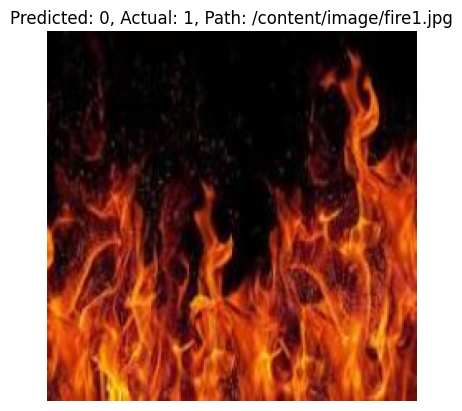

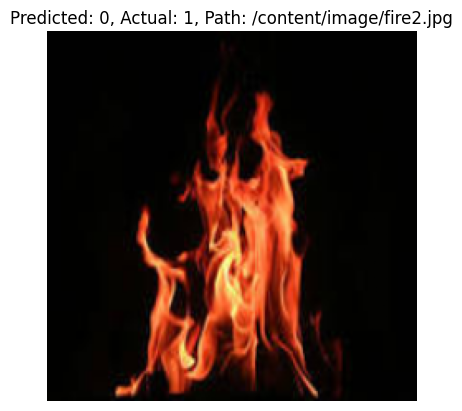

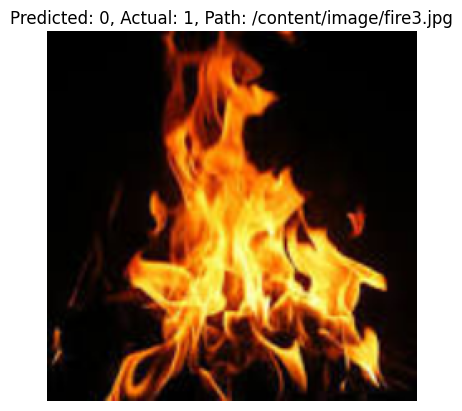

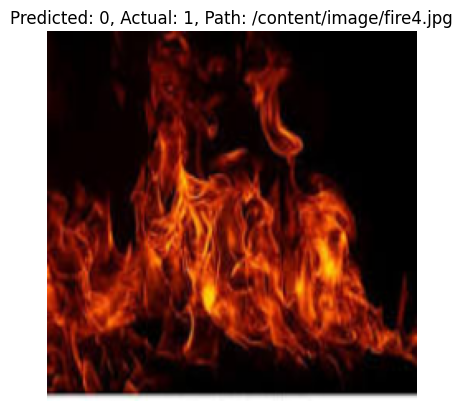

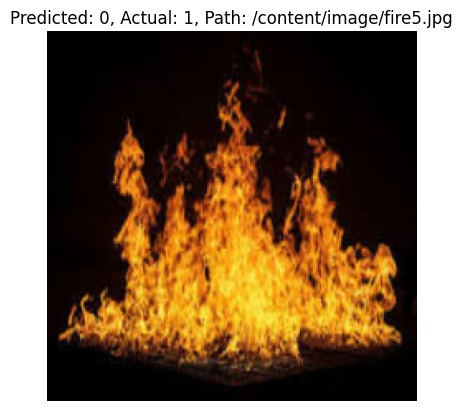

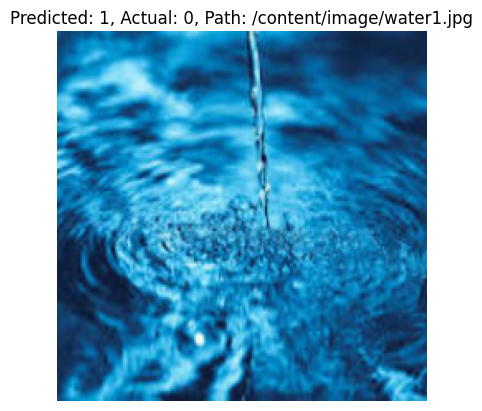

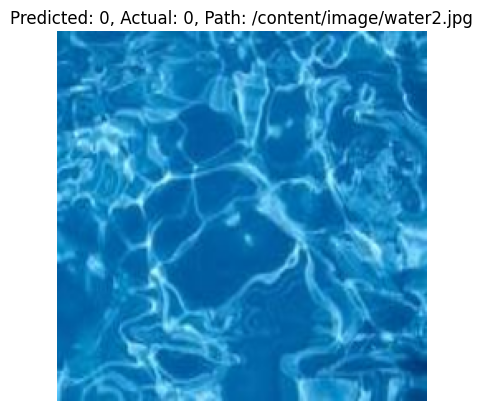

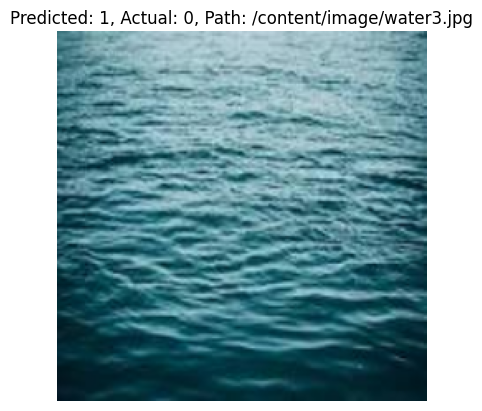

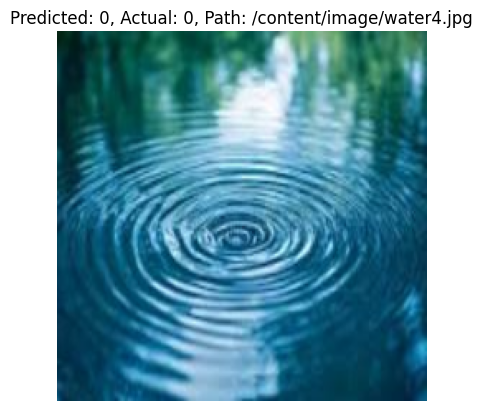

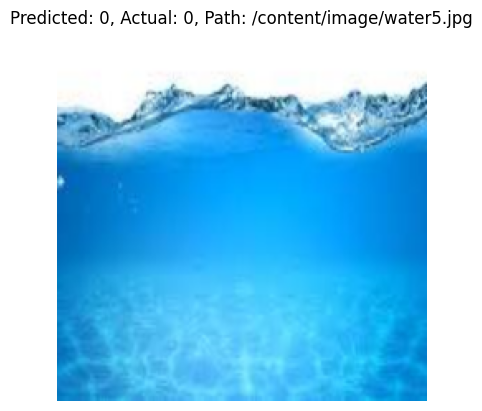

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# --- Custom Dataset Loader for Multimodal Data ---
class MultimodalDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Load Image
        image_path = self.data.iloc[idx, 0]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Tokenize Text
        text_embedding = torch.randn(1, 512)  # Placeholder for text embeddings

        label = torch.tensor(self.data.iloc[idx, 2], dtype=torch.long)

        return image, text_embedding, label, image_path

# --- Vision Transformer (ViT) from Scratch ---
class ViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=512, num_heads=8, num_layers=6):
        super(ViT, self).__init__()
        self.patch_size = patch_size
        self.num_patches = (img_size // patch_size) ** 2
        self.embedding_dim = embed_dim

        # Patch embedding
        self.patch_embed = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Positional encoding
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embed_dim))

        # Transformer Encoder
        self.encoder = TransformerEncoder(embed_dim, num_heads, num_layers)

        # Classification head
        self.classifier = nn.Linear(embed_dim, 256)

    def forward(self, x):
        x = self.patch_embed(x)  # Convert image to patches
        x = x.flatten(2).transpose(1, 2)  # Reshape to sequence format
        x = x + self.pos_embedding[:, :x.shape[1], :]  # Add positional encoding
        x = self.encoder(x)  # Pass through Transformer
        x = x.mean(dim=1)  # Global average pooling
        return self.classifier(x)

# --- Transformer Encoder from Scratch ---
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, num_layers):
        super(TransformerEncoder, self).__init__()
        self.layers = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads) for _ in range(num_layers)
        ])

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# --- Transformer Block (Self-Attention + FFN) ---
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(TransformerBlock, self).__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, 4 * embed_dim),
            nn.ReLU(),
            nn.Linear(4 * embed_dim, embed_dim)
        )
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
        x = x + self.attn(x, x, x)[0]  # Self-Attention with residual connection
        x = self.norm1(x)
        x = x + self.ffn(x)  # Feed-forward network with residual connection
        x = self.norm2(x)
        return x

# --- Multimodal Classifier (Combining Image + Text) ---
class MultimodalClassifier(nn.Module):
    def __init__(self):
        super(MultimodalClassifier, self).__init__()
        self.image_encoder = ViT()
        self.text_encoder = nn.Linear(512, 256)  # Simple text projection layer
        self.fusion = nn.Linear(256 + 256, 128)
        self.classifier = nn.Linear(128, 2)  # Binary classification

    def forward(self, image, text):
        image_features = self.image_encoder(image)
        text_features = self.text_encoder(text)
        text_features = text_features.squeeze(1)  # Fixing shape mismatch issue
        fused_features = torch.cat((image_features, text_features), dim=1)  # Concatenation
        fused_features = torch.relu(self.fusion(fused_features))
        return self.classifier(fused_features)

# --- Training & Testing ---
def train_model(csv_file):
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

    dataset = MultimodalDataset(csv_file=csv_file, transform=transform)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

    model = MultimodalClassifier()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    # Training loop
    for epoch in range(25):  # Small number of epochs for demonstration
        model.train()
        for images, texts, labels, image_paths in dataloader:
            optimizer.zero_grad()
            outputs = model(images, texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

    print("Training complete!")

def test_model(csv_file):
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
    dataset = MultimodalDataset(csv_file=csv_file, transform=transform)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
    model = MultimodalClassifier()
    model.eval()

    with torch.no_grad():
        for images, texts, labels, image_paths in dataloader:
            outputs = model(images, texts)
            predicted = torch.argmax(outputs, dim=1)
            img = images[0].permute(1, 2, 0).numpy()
            plt.imshow(img)
            plt.title(f"Predicted: {predicted.item()}, Actual: {labels.item()}, Path: {image_paths[0]}")
            plt.axis("off")
            plt.show()

if __name__ == "__main__":
    train_model("fire_water_dataset.csv")
    test_model("fire_water_dataset.csv")

# With Embedding

Epoch 1: Loss = 0.6977
Epoch 2: Loss = 0.8213
Epoch 3: Loss = 0.4740
Epoch 4: Loss = 0.1611
Epoch 5: Loss = 0.0492
Epoch 6: Loss = 0.0212
Epoch 7: Loss = 0.0055
Epoch 8: Loss = 0.0069
Epoch 9: Loss = 0.0023
Epoch 10: Loss = 0.0040
Epoch 11: Loss = 0.0014
Epoch 12: Loss = 0.0009
Epoch 13: Loss = 0.0021
Epoch 14: Loss = 0.0020
Epoch 15: Loss = 0.0008
Epoch 16: Loss = 0.0015
Epoch 17: Loss = 0.0013
Epoch 18: Loss = 0.0011
Epoch 19: Loss = 0.0005
Epoch 20: Loss = 0.0009
Epoch 21: Loss = 0.0004
Epoch 22: Loss = 0.0004
Epoch 23: Loss = 0.0003
Epoch 24: Loss = 0.0009
Epoch 25: Loss = 0.0006
Training complete!


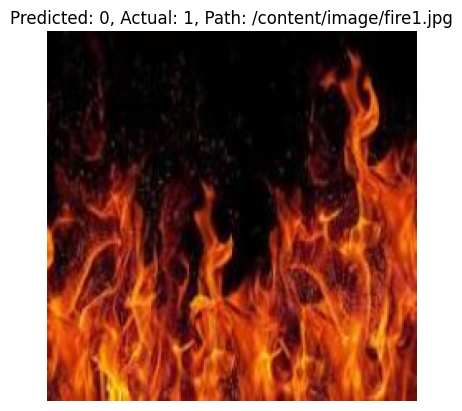

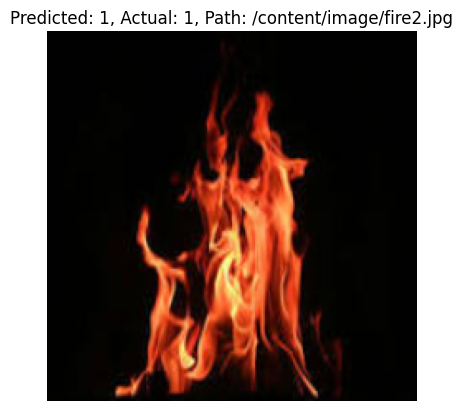

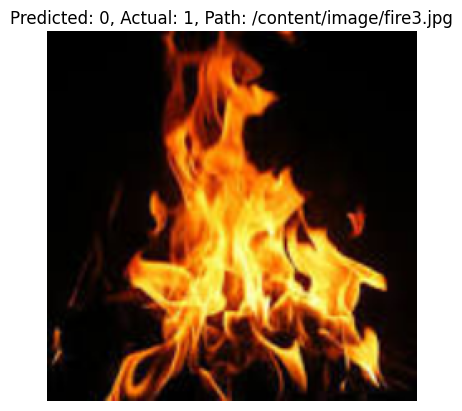

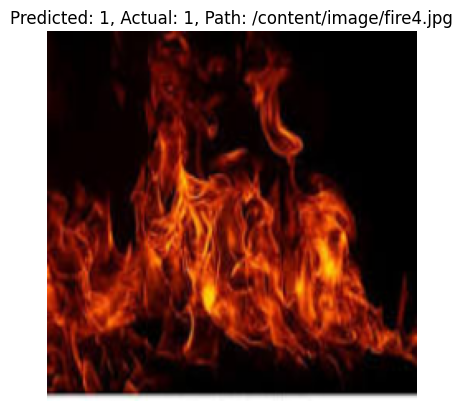

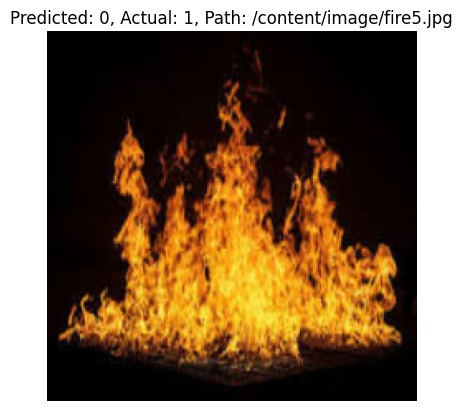

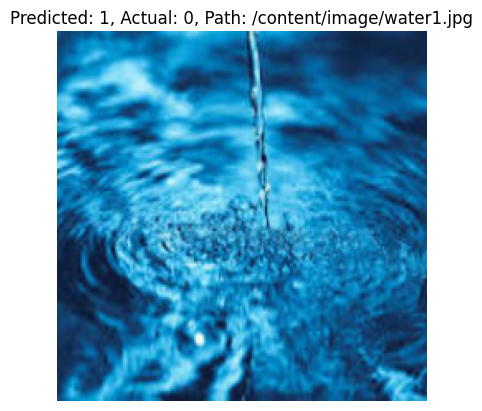

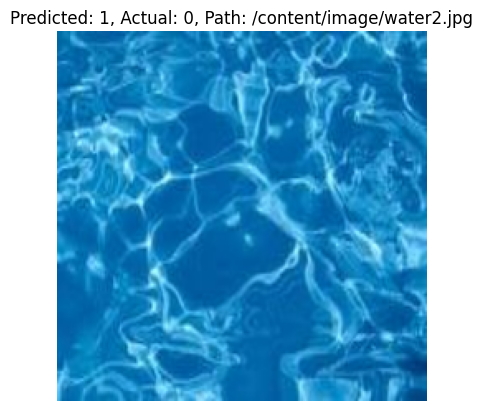

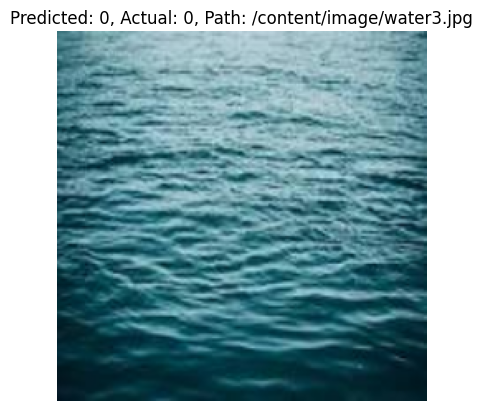

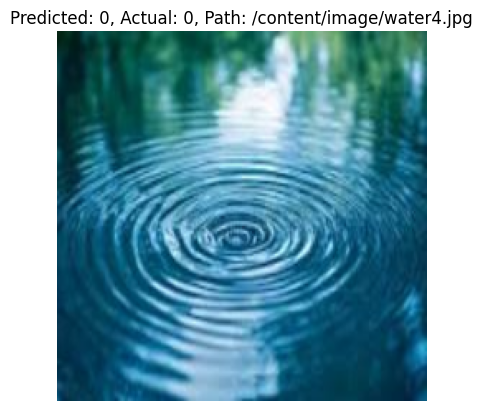

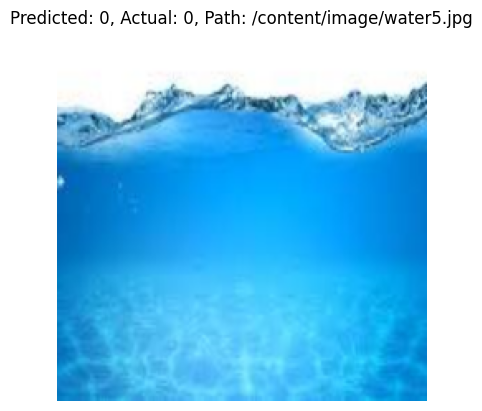

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# --- Tokenizer & Vocabulary for Text Encoding ---
def simple_tokenizer(text):
    return text.lower().split()  # Basic whitespace tokenizer

# Build a simple vocabulary
vocab = {word: idx for idx, word in enumerate(set(" ".join(pd.read_csv("fire_water_dataset.csv")["Text Description"]).lower().split()))}
vocab_size = len(vocab)

# --- Custom Embedding Layer ---
class TextEmbedding(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super(TextEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)

    def forward(self, text):
        token_ids = torch.tensor([vocab.get(token, 0) for token in simple_tokenizer(text)], dtype=torch.long)
        return self.embedding(token_ids).mean(dim=0)  # Average token embeddings

# --- Custom Dataset Loader for Multimodal Data ---
class MultimodalDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.text_embedder = TextEmbedding(vocab_size, 256)  # Define text embedding

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Load Image
        image_path = self.data.iloc[idx, 0]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Convert text to embeddings
        text = self.data.iloc[idx, 1]
        text_embedding = self.text_embedder(text)  # Get text embeddings

        label = torch.tensor(self.data.iloc[idx, 2], dtype=torch.long)

        return image, text_embedding, label, image_path

# --- Vision Transformer (ViT) from Scratch ---
class ViT(nn.Module):
    def __init__(self, img_size=224, patch_size=16, in_channels=3, embed_dim=512, num_heads=8, num_layers=6):
        super(ViT, self).__init__()
        self.patch_size = patch_size
        self.num_patches = (img_size // patch_size) ** 2
        self.embedding_dim = embed_dim

        # Patch embedding
        self.patch_embed = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Positional encoding
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embed_dim))

        # Transformer Encoder
        self.encoder = TransformerEncoder(embed_dim, num_heads, num_layers)

        # Classification head
        self.classifier = nn.Linear(embed_dim, 256)

    def forward(self, x):
        x = self.patch_embed(x)  # Convert image to patches
        x = x.flatten(2).transpose(1, 2)  # Reshape to sequence format
        x = x + self.pos_embedding[:, :x.shape[1], :]  # Add positional encoding
        x = self.encoder(x)  # Pass through Transformer
        x = x.mean(dim=1)  # Global average pooling
        return self.classifier(x)

# --- Transformer Encoder from Scratch ---
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, num_layers):
        super(TransformerEncoder, self).__init__()
        self.layers = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads) for _ in range(num_layers)
        ])

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# --- Transformer Block (Self-Attention + FFN) ---
class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(TransformerBlock, self).__init__()
        self.attn = nn.MultiheadAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, 4 * embed_dim),
            nn.ReLU(),
            nn.Linear(4 * embed_dim, embed_dim)
        )
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
        x = x + self.attn(x, x, x)[0]  # Self-Attention with residual connection
        x = self.norm1(x)
        x = x + self.ffn(x)  # Feed-forward network with residual connection
        x = self.norm2(x)
        return x

# --- Multimodal Classifier (Combining Image + Text) ---
class MultimodalClassifier(nn.Module):
    def __init__(self):
        super(MultimodalClassifier, self).__init__()
        self.image_encoder = ViT()
        self.text_encoder = nn.Linear(256, 256)  # Adjusted text embedding layer
        self.fusion = nn.Linear(256 + 256, 128)
        self.classifier = nn.Linear(128, 2)  # Binary classification

    def forward(self, image, text):
        image_features = self.image_encoder(image)
        text_features = self.text_encoder(text)
        fused_features = torch.cat((image_features, text_features), dim=1)  # Concatenation
        fused_features = torch.relu(self.fusion(fused_features))
        return self.classifier(fused_features)

# --- Training & Testing ---
def train_model(csv_file):
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

    dataset = MultimodalDataset(csv_file=csv_file, transform=transform)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

    model = MultimodalClassifier()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=2e-4)

    # Training loop
    for epoch in range(25):  # Small number of epochs for demonstration
        model.train()
        for images, texts, labels, image_paths in dataloader:
            optimizer.zero_grad()
            outputs = model(images, texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

    print("Training complete!")

def test_model(csv_file):
    transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
    dataset = MultimodalDataset(csv_file=csv_file, transform=transform)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
    model = MultimodalClassifier()
    model.eval()

    with torch.no_grad():
        for images, texts, labels, image_paths in dataloader:
            outputs = model(images, texts)
            predicted = torch.argmax(outputs, dim=1)
            img = images[0].permute(1, 2, 0).numpy()
            plt.imshow(img)
            plt.title(f"Predicted: {predicted.item()}, Actual: {labels.item()}, Path: {image_paths[0]}")
            plt.axis("off")
            plt.show()

if __name__ == "__main__":
    train_model("fire_water_dataset.csv")
    test_model("fire_water_dataset.csv")